In [1]:
pip install tweepy

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
API_Key = "Your api key"
API_Key_Secret="Your api secret"
Access_Token = "Your access token"
Access_Token_Secret = "Your access token secret"


In [4]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob

## Twitter Client Class ##

In [5]:
class TwitterClient():  # create object in main class to use them.
    def __init__(self, twitter_user=None):
        self.auth=TwitterAuthenticator().twitter_auth()
        self.twitter_client=API(self.auth)
        self.twitter_user=twitter_user
    
    def get_twitter_api(self):
        return self.twitter_client
    
    def get_tweets(self, num_tweets): #user tweets/retweets
        tweets=[]
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    def get_t_tweets(self, num_tweets): #home timeline tweets
        t_tweets=[]
        for tweet in Cursor(self.twitter_client.home_timeline,).items(num_tweets):
            t_tweets.append(tweet)
        return t_tweets

## Twitter Autheticator ##

In [6]:
class TwitterAuthenticator():
    def twitter_auth(self):
        auth = OAuthHandler(API_Key, API_Key_Secret)
        auth.set_access_token(Access_Token, Access_Token_Secret)
        return auth
        

## Twitter Streamer ##

In [7]:
class Twitterstreamer(): #for streaming and process live tweets
    def __init__(self):
        self.twitter_auth = TwitterAuthenticator()
    def stream_tweets(self,fetched_tweets, hash_tag_list):
        
    #this handles twitter authentication api and the connection to the twitter streaming api
        listener = TwitterListener(fetched_tweets)
        auth=self.twitter_auth.twitter_auth()
        stream = Stream(auth, listener)
        stream.filter(track=hash_tag_list) #filter tweets to capture data by keywords
    

## Twitter Listener ##

In [8]:
class TwitterListener(StreamListener): #store tweets
    def __init__(self, fetched_tweets): #to store
        self.fetched_tweets= fetched_tweets
        
    def on_data(self, data):
        try: #deal with errros
            print(data)
            with open(self.fetched_tweets, 'a') as tf:
                tf.write(data) #write into file
            return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
    
    def on_error(self, status):
        if status ==420:
            return False # returning false incase errors occurs
        print(status)
        


## Twitter analyzer ##

In [18]:
class Tweetanalyzer():
    def tweet_to_df(self, tweets):
        df=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) #extract text data from each tweet
        
        df['Id']=np.array([tweet.id for tweet in tweets])
        df['Length']=np.array([len(tweet.text) for tweet in tweets])
        df['Retweets']=np.array([tweet.retweet_count for tweet in tweets])
        df['Date']=np.array([tweet.created_at for tweet in tweets])
        df['Source']=np.array([tweet.source for tweet in tweets])
        df['Likes']=np.array([tweet.favorite_count for tweet in tweets])
       # df['Location']=np.array([tweet.geo for tweet in tweets])
        return df
    
    def clean_tweet(self, tweet):   #removing extra symbols in tweet.
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def analyze_sentiment(self, tweet):
        analysis=TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:  # Positive
            return 1
        elif analysis.sentiment.polarity ==0: # Neutral
            return 0
        else:
            return -1                         # Negative
        

In [21]:
if __name__ == "__main__":
    #hash_tag_list = ['covid19']
    #fetched_tweets = "tweets.txt"
    
    
    
    twitter_client=TwitterClient()
    twitter_analyzer=Tweetanalyzer()
    api=twitter_client.get_twitter_api()
    tweets=api.user_timeline(id='elonmusk', count=150)
    
    df=twitter_analyzer.tweet_to_df(tweets)
    
    df['Sentiment']=np.array([twitter_analyzer.analyze_sentiment(tweet) for tweet in df['Tweets']])
    

    #print(twitter_client.get_tweets(1))
    
    #twitter_streamer = Twitterstreamer()
    #twitter_streamer.stream_tweets(fetched_tweets, hash_tag_list)



In [11]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [22]:
df.head()

,Tweets,Id,Length,Retweets,Date,Source,Likes,Sentiment
0,"@Sinan25 Sorry, noise reduction has gotten muc...",1296364519569215489,94,5,2020-08-20 08:32:41,Twitter for iPhone,385,0
1,@Dami_Kolz09 🤣,1296363892067762177,14,7,2020-08-20 08:30:11,Twitter for iPhone,168,0
2,"@jussiwen Hardcore techno, aber vielleicht ein...",1296362191562723328,87,67,2020-08-20 08:23:26,Twitter for iPhone,1313,0
3,New Tesla feature coming that enables your car...,1296360799498391552,139,1509,2020-08-20 08:17:54,Twitter for iPhone,20015,1
4,https://t.co/Bki5SOOroe,1296359612141187073,23,2012,2020-08-20 08:13:11,Twitter for iPhone,23236,0


In [ ]:
df.describe()

# Time Series Graph

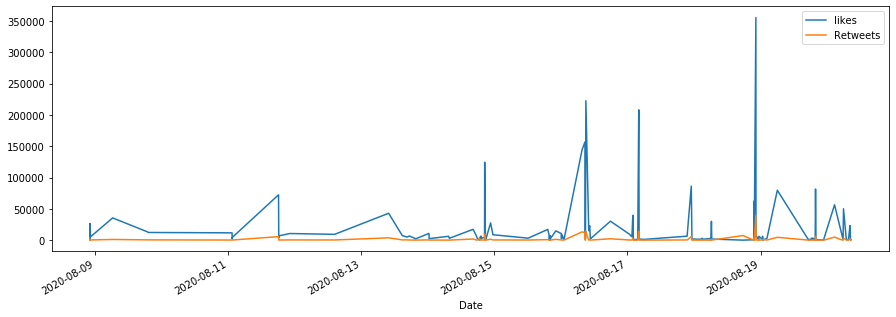

In [23]:
    time_likes = pd.Series(data=df['Likes'].values, index=df['Date'])
    time_likes.plot(figsize=(15,5), label='likes', legend=True)
    time_retweets = pd.Series(data=df['Retweets'].values, index=df['Date'])
    time_retweets.plot(figsize=(15,5), label='Retweets', legend=True)
    plt.show()